In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
# create moon shaped dataset
from sklearn.datasets import make_moons, make_classification
moon =make_moons(noise=0.3, random_state=0)
features,labels=moon
print(features)
print(labels)


[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]
 [ 0.88248972 -0.07575606]
 [-0.0551441  -0.03733246]
 [ 0.82954503 -0.53932149]
 [ 2.11285708  0.66208353]
 [ 0.5696927   0.33744136]
 [ 0.95217454 -0.75307471]
 [-0.02922115  0.39287336]
 [ 1.71579557  0.36069454]
 [-0.27883014  0.61420539]
 [ 2.00344509 -0.3091496 ]
 [ 1.50009616 -0.74636376]
 [ 1.22540835  1.19793017]
 [ 0.46730819  0.54703192]
 [-0.36653222  1.11971633]
 [ 0.30124459  1.23315697]
 [ 0.30430746  0.82373935]
 [-0.23712492  0.77876034]
 [ 1.16339832  0.55290238]
 [-0.59702417  0.6572361 ]
 [ 0.46356735 -0.1951543 ]
 [ 0.68451111  0.75287685]
 [ 0.70515699 -0.45892444]
 [-0.65805008 -0.12944211]
 [-0.74662946 -0.3829632 ]
 [ 0.60585226  0.31252842]
 [ 2.18137168 -0.02291747]
 [ 1.91980633  0.17247329]
 [ 1.4834364  -0.10517023]
 [ 0.47404723 -0.14575067]
 [ 1.05614605 -1.03570207]
 [ 1.86500732 -0.01107874]
 [ 0.4194721  -0.32478101]
 [ 0.06873258  0.56648467]
 [-0.17332432  1.00215131]
 [ 0.12412421  1.00062892]
 

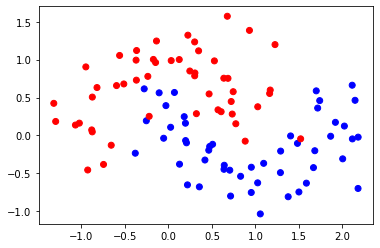

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
h = .02 # step size in the mesh
X, y=features,labels
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)
colors=["red","blue"]
plt.scatter(features[:,0],features[:,1],color=[colors[idx] for idx in labels])
plt.show()


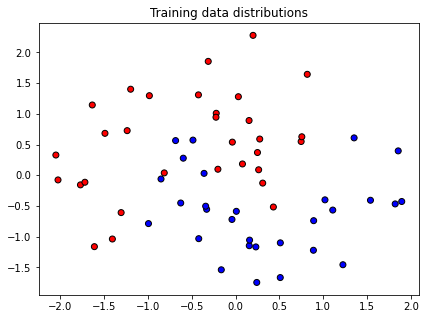

In [35]:
 # just plot the dataset first
from matplotlib.colors import ListedColormap
plt.subplots(figsize = (15,5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, 1)
ax.set_title("Training data distributions")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=3,
              max_iter=500, random_state=12, solver='lbfgs')

In [37]:
# neuro weights without considering bias
print(clf.coefs_)
# neron bias weights
print(clf.intercepts_)

[array([[ -21.46559409,   93.0867095 ,  -29.53530518],
       [  22.66496876, -133.97499997,   91.89652809]]), array([[-29.89149332],
       [ 31.92243399],
       [-25.29530447]])]
[array([ 31.6954467 , 145.64502934,  66.18834028]), array([22.95246818])]


In [38]:
def findSlopeIntercept(coefs,bias):
    hidden_wts=coefs[0]
    bias_wts=bias[0]
    num=len(hidden_wts[0])
    slopIntercept=[]
    for i in range(num):
        w=[bias_wts[i],hidden_wts[0,i],hidden_wts[1,i]]
        slope=w[1]/w[2]*(-1)
        intercept=w[0]/w[2]*(-1)
        slopIntercept.append([slope,intercept])
    return(slopIntercept)


In [39]:
slopeIntercept= findSlopeIntercept(clf.coefs_,clf.intercepts_)
slopeIntercept


[[0.9470824474653626, -1.398433284061149],
 [0.694806564832219, 1.087106022538639],
 [0.3213973997910207, -0.7202485410269862]]

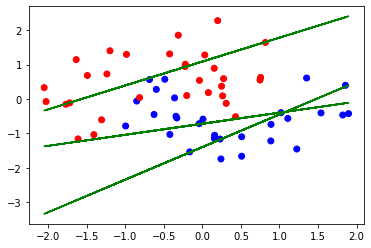

In [40]:
colors=["red","blue"]
xvalues=X_train[:,0]
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"g-")
plt.show()



[]

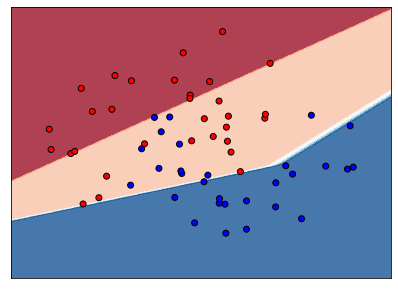

In [41]:
 # Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())



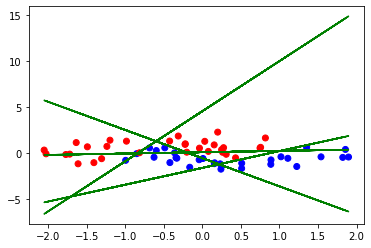

In [42]:
 # now increase to 4 hidden nodes
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"g-")
plt.show()


Text(0.5, 1.0, 'Multi Layer Neural Network')

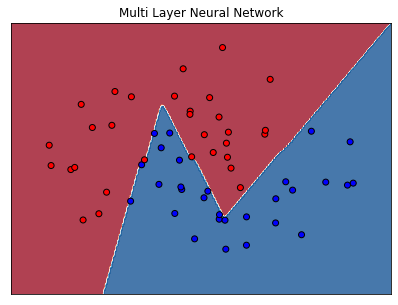

In [43]:
 # Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')


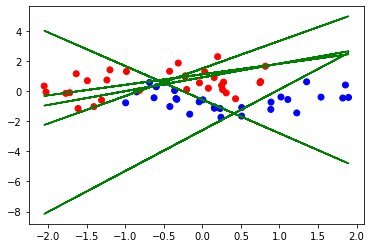

In [44]:
# now increase to 5 hidden nodes. As we add more hidden nodes, the model is becoming more complex
# and therefore, have a higher risk of overfitting
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"g-")
plt.show()


Text(0.5, 1.0, 'Multi Layer Neural Network')

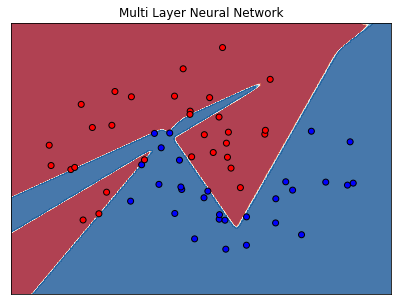

In [45]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')


In [49]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")
# data (400 images, each 64x64)
print(data.shape)
# labels
print(target.shape)
print(target)



(400, 64, 64)
(400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32

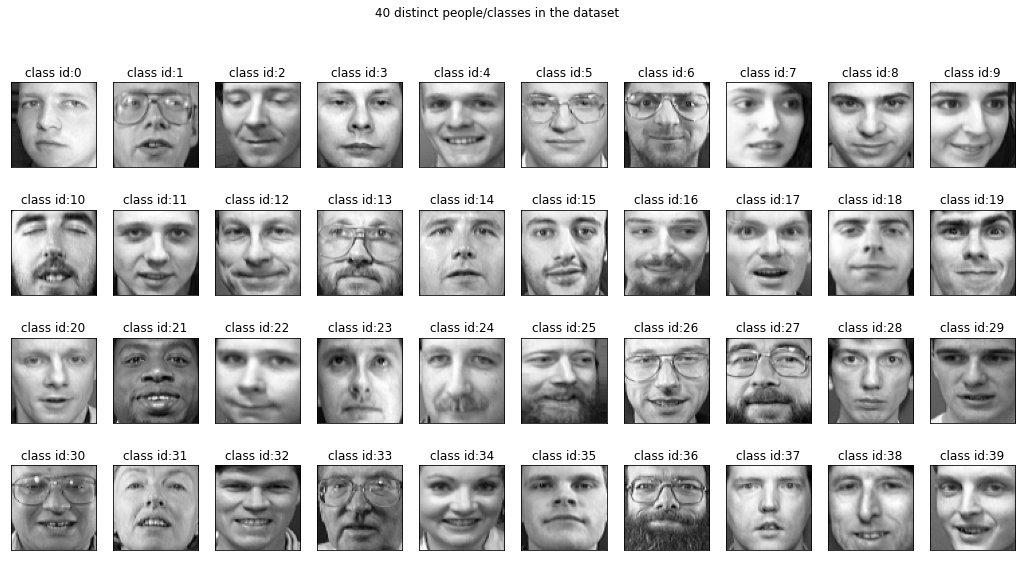

In [52]:
def show_a_random_face_per_class(images, unique_ids):
    #Creating 4X10 subplots in 18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    #iterating over user ids
    rand=np.random.randint(10)
    for unique_id in unique_ids:
        image_index=unique_id*10+rand
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("class id:{}".format(unique_id))
    plt.suptitle("40 distinct people/classes in the dataset")

    
show_a_random_face_per_class(data, np.unique(target))


In [55]:
 # now we flatten each 64x64 image as a single vector 64x64=4096 (for trainingNN)
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
X.shape


(400, 4096)

In [60]:
 # now we slpilt training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.4,stratify=target, random_state=1)
print(X_train.shape)
print(X_test.shape)


(240, 4096)
(160, 4096)


In [61]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=42,activation='logistic',max_iter=1000)
clf.fit(X_train, y_train)


c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
              random_state=42, solver='lbfgs')

In [62]:
y_pred=clf.predict(X_test)
print(y_test)
print(y_pred)


[19 19 17  2 27 14 13  9 37 21 35 39 39 13 35  3 31 19 20 16 29  9 13 30
 20 11 34  5 15 25 14 23 22 18  2 38 35 24  2 30  5 12 12  7 33 15  4 16
  4 11  0  7 39 34  0 26 30 38 22 26  1 13 24 36 17 27 14 10 28 39 38 32
 15  8 11 25 28 20 10  4  6 10 18  9  0 35 34 18  8 16 16 12 28 18  7 25
  7 37 31 21 29  6 21  9  3  0 33 26  6 27 17 23 33 24 38 32 12 37 15  1
  1 34 31 14  8 33 31  1 10 22 17 19 30 36 29  5 23  8  5 36 32  6  3 29
 20 24 32 22 26  4 36 25 27 37 28 11 21  3 23  2]
[ 5  5  5  7 31  7 31  7  7 31 39  5 33  7  6  6 31  5  7  6  5  7 31  7
  5  6  7  5 31 31  7  5 31 31  5  7  5  7  5  7  5  7 24  7  7  5  5  6
  5 31  5  7  5  5  5 31  5  7 31 31  7 31  7 31  5 21  7 31  5  5  5  5
  5  5 31 31  7  5 31  5  6 31 31  5  7  5  7 31 23 31  6  5  5 31  5 31
  7  7 31  7  5  6 13  7 31  6  7 31  6 31  5  6  7  7  7  5  5  5  5  7
  7  5 31 28  5  7 31  7 31 31  5 39  7  7  7  5  5  6  5 31  5  6  5  5
  5  7  5 31 31  5 31  7 31  5  5  6  7  7  7  7]


In [63]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
cf


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
# use scikit-learn to calculate accuracy.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.09375

In [66]:
 # K fold cross-validation
from sklearn.model_selection import KFold

y = target
kf = KFold(n_splits=3,shuffle=True)
# Returns the number of splitting iterations in the cross-validator
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



TRAIN: [  0   1   2   4   7  11  12  13  14  15  16  17  20  21  24  27  28  30
  31  33  35  36  39  40  41  42  43  44  45  46  47  49  50  51  52  53
  54  55  58  59  62  63  65  67  68  69  71  72  77  78  79  80  82  83
  86  87  88  90  91  92  95  96  98 102 103 104 105 109 110 111 112 114
 115 116 117 118 120 121 123 124 125 127 128 129 130 131 132 135 136 138
 140 141 142 143 145 147 148 149 151 153 154 155 161 163 165 166 167 168
 169 172 176 178 179 180 182 183 184 185 187 188 189 190 193 195 197 198
 201 203 205 207 209 210 211 212 213 214 217 218 219 220 222 223 224 225
 226 227 230 231 234 235 236 237 238 240 241 242 243 245 248 249 250 251
 252 253 256 257 258 263 264 265 267 269 270 271 272 273 274 275 278 280
 281 283 285 287 289 290 291 292 293 294 298 299 301 302 304 305 306 307
 308 309 310 312 314 315 316 317 318 319 322 325 326 327 328 329 331 332
 333 336 337 338 339 340 341 342 343 344 345 346 347 349 350 352 356 358
 359 361 362 363 364 366 369 370 371 372 374

In [68]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc1 = [] 
Acc2 = []
Acc3 = []
Acc4 = []

kf.get_n_splits(X)   

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=42,activation='logistic',max_iter=1000)
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc1.append(accuracy_score(y_test, y_pred))
    
    clf2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,), random_state=42,activation='logistic',max_iter=1000)
    clf2.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc2.append(accuracy_score(y_test, y_pred)) 
    
    clf3 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(500,), random_state=42,activation='logistic',max_iter=1000)
    clf3.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc3.append(accuracy_score(y_test, y_pred))
    
    clf4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,10), random_state=42,activation='logistic',max_iter=1000)
    clf4.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc4.append(accuracy_score(y_test, y_pred))
    
print(Acc1)   
print(Acc2) 
print(Acc3)
print(Acc4)

print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc1))
print("The average accuracy of the 2nd Classifier is %.4f" % np.mean(Acc2))
print("The average accuracy of the 2nd Classifier is %.4f" % np.mean(Acc3))
print("The average accuracy of the 2nd Classifier is %.4f" % np.mean(Acc4))

c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to conv

KeyboardInterrupt: 

In [80]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc1 = [] 
 

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=42,activation='logistic',max_iter=3000, verbose=False)
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc1.append(accuracy_score(y_test, y_pred))
    
  
print(Acc1)   

print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc1))


c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to conv

[0.075, 0.05, 0.2, 0.075, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0]
The average accuracy of the 1st Classifier is 0.0450


In [75]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc2 = [] 
 

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,), random_state=42,activation='logistic',max_iter=5000, verbose=False)
    clf2.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc2.append(accuracy_score(y_test, y_pred)) 
  
    
  
print(Acc2)   

print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc2))

[0.125, 0.2, 0.2, 0.125, 0.25, 0.2, 0.2, 0.175, 0.175, 0.15]
The average accuracy of the 1st Classifier is 0.1800


In [77]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc3 = [] 
 

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(500,), random_state=42,activation='logistic',max_iter=5000, verbose=False)
    clf2.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc3.append(accuracy_score(y_test, y_pred)) 
  
    
  
print(Acc3)   

print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc3))

[0.3, 0.1, 0.2, 0.2, 0.225, 0.175, 0.225, 0.1, 0.2, 0.075]
The average accuracy of the 1st Classifier is 0.1800


In [81]:
# now compare k-fold cross validation accuracies between two models
from sklearn.metrics import accuracy_score 
from sklearn import tree 
y=target
kf = KFold(n_splits=10,shuffle=True) 
kf.get_n_splits(X)
Acc4 = [] 
 

for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,10), random_state=42,activation='logistic',max_iter=1000)
    clf4.fit(X_train, y_train)
    y_pred = clf1.predict(X_test) 
    Acc4.append(accuracy_score(y_test, y_pred))
  
    
  
print(Acc4)   

print("The average accuracy of the 1st Classifier is %.4f" % np.mean(Acc4))

c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to conv

[0.075, 0.05, 0.0, 0.1, 0.1, 0.0, 0.1, 0.05, 0.1, 0.05]
The average accuracy of the 1st Classifier is 0.0625


c:\users\kevin\appdata\local\programs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
